Python version 2.7.10 (default, Jul 15 2017, 17:16:57) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.31)]
Pandas version 0.23.3
Matplotlib version 2.2.2
['chanPoll', 'EGO_GET_RESOURCE_PLAN', 'distribute', 'cm_housekeeping', 'VEM_LOGON']


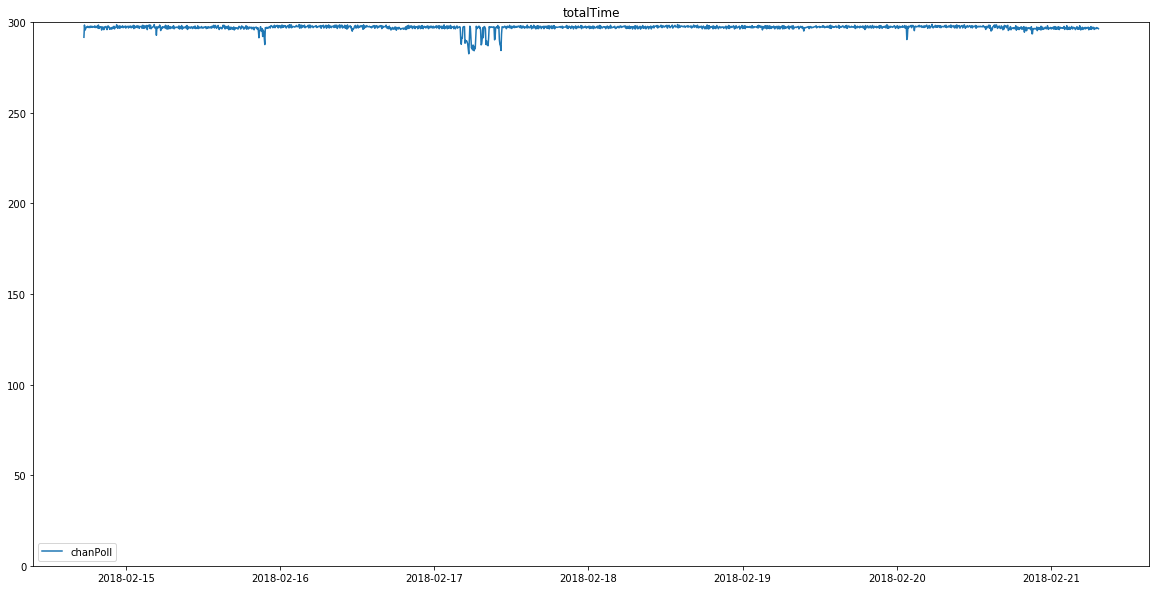

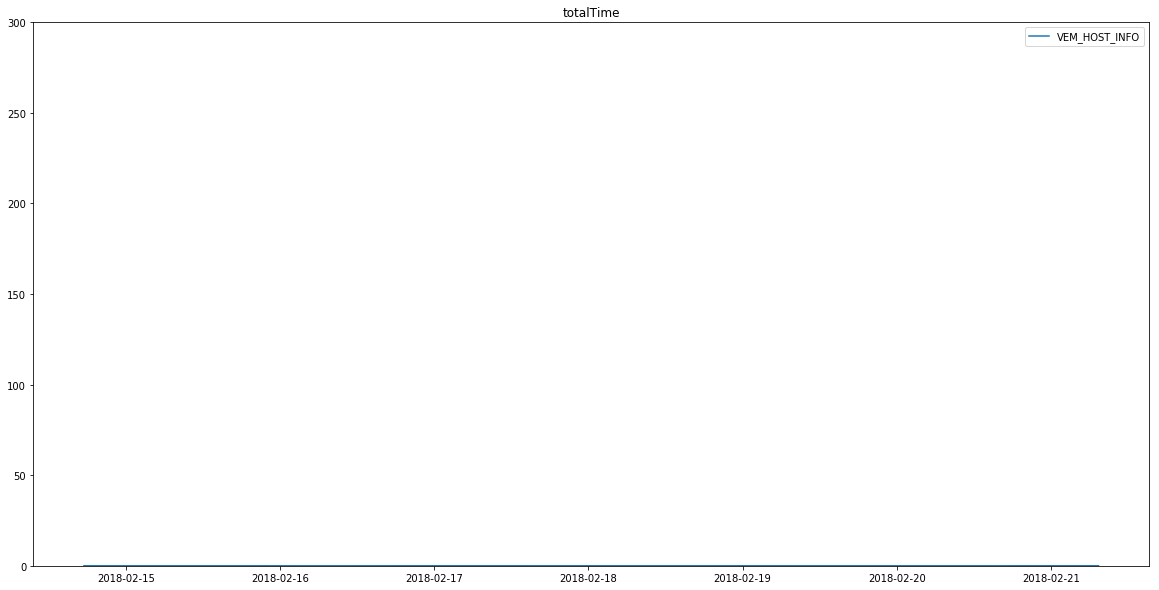

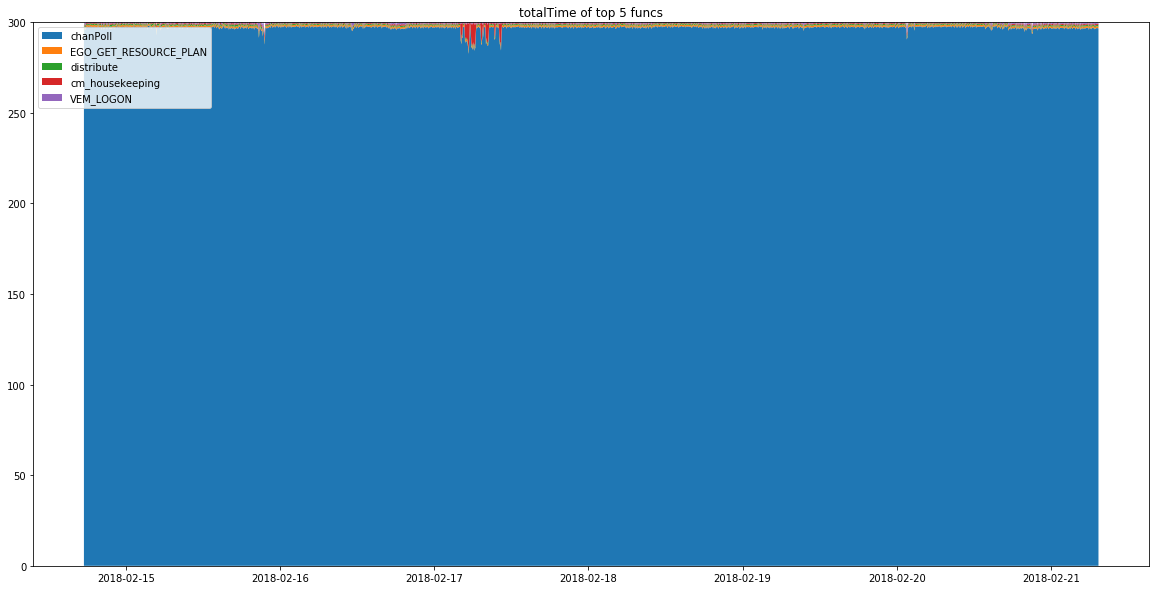

In [1]:
import pandas as pd
import os
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import matplotlib.pyplot as plt
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Location = r'/Users/yudowang/prj/vemkdloganalyze/vemkd.log.sym712'
df=pd.read_table(Location, sep='\n', names=['line'], header=None, error_bad_lines=False)
df.size
df['line']=df['line'].str.replace('<', '').str.replace('>', '').str.replace('[', '').str.replace(']', '')
if os.path.exists('vemkd.csv'):
    os.remove('vemkd.csv')
df[df['line'].str.contains('printPerf')].to_csv('vemkd.csv',index=False,header=False)

col712 = ['Date', 'Time', 'Pid', 'OpCode', 'totalCnt', 'totalTime', 'maxTime', 'minTime', 'totalFileIO', 'maxFileIO', 'minFileIO', 'totalIOCounter', 'totalChanOpenTime', 'maxChanOpenTime', 'minChanOpenTime', 'func']
File = r'vemkd.csv'
df=pd.read_table(File, sep=' ', header=None, names=col712, usecols=[0,1,4,8,10,12,14,16,18,20,22,24,26,28,30,32], error_bad_lines=False, parse_dates=[[0, 1]], index_col=0)

df.head()

date_time_func = df.reset_index().groupby(['func','Date_Time']).sum()
date_time_func.head()
date_time_func.index.levels[0]
date_time_func.index.levels[1]

plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime')
plt.plot(date_time_func.loc['chanPoll']['totalTime'], label='chanPoll')
plt.legend()

is_chanPoll = df['func'] == "chanPoll"
is_totalTimeSmall = df['totalTime'] < 50
df[is_chanPoll & is_totalTimeSmall]['totalTime'][:10]
df[df.index == '2017-11-28 11:29:42'][['totalTime', 'func']].sort_values('totalTime', ascending=False)

plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime')
plt.plot(date_time_func.loc['VEM_HOST_INFO']['totalTime'], label='VEM_HOST_INFO')
plt.legend()

function = df.groupby('func')
function['totalTime'].mean().sort_values(ascending=False).head(5)

function.size()

num = len(function.get_group('chanPoll'))
newdf = function.filter(lambda x: len(x)==num)
newdf.groupby('func').size()
newfunction = newdf.groupby('func')
newfunction['totalTime'].mean().sort_values(ascending=False).head(5)

s = newfunction['totalTime'].mean().sort_values(ascending=False).head(5).index

la = []
for i in range(0, 5):
    la.append(s[i])
    
print la

new_date_time_func = newdf.reset_index().groupby(['func','Date_Time']).sum()

y = []
for x in s:
    y.append(new_date_time_func.loc[x]['totalTime'])
    
plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime of top 5 funcs')
x = newfunction.get_group('chanPoll').index
plt.stackplot(x, y, labels=la)
plt.legend(loc='upper left')